# Content
- Introduction
- Scatter plots and correlation
- Regression
    - Simple Linear Regression
    - Coefficient of Determination and Standard Error of the Estimate
    - Multiple Linear Regression
    - Logistic Regression

In [4]:
# Imports
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import pylab

In [52]:
# Generic functions

def preferred_rounding(v, decimals=2):
    return str(round(v, decimals))

def display_probability_density_chart(
    cv_left=None,
    cv_right=None,
    test_value=None,
):
    r'''
    Display probability density chart.
    '''  
    fig, ax = plt.subplots(1, 1, figsize=(11, 5))
    
    # Standard normal distribution curve
    x = np.linspace(
        stats.norm.ppf(0.001),
        stats.norm.ppf(0.999), 
        100
    )
    curve = stats.norm.pdf(x)
        
    ax.plot(
        x, 
        curve,
        'r-', 
        color='#000000',
        lw=3, 
        alpha=0.8,
        label='Standard normal distribution curve'
    )
    
    # Critical region(s) in chart
    if cv_left:
        critical_region_left = np.linspace(-3.1, cv_left, 100)
        ax.fill_between(
            critical_region_left, 
            stats.norm.pdf(critical_region_left), 
            color='#f4c242', 
            alpha=0.5,
        )
        critical_value_left = np.linspace(cv_left-0.01, cv_left+0.01, 100)
        ax.fill_between(
            critical_value_left, 
            stats.norm.pdf(critical_value_left), 
            color='#f4c242', 
            alpha=1, 
            label='C.V. = ' + preferred_rounding(cv_left)
        )
        
    if cv_right:
        critical_region_right = np.linspace(cv_right, 3.1, 100)
        critical_value_right = np.linspace(cv_right-0.01, cv_right+0.01, 100)
        ax.fill_between(
            critical_value_right, 
            stats.norm.pdf(critical_value_right), 
            color='#f4c242', 
            alpha=1, 
            label='C.V. = ' + preferred_rounding(cv_right)
        )
        ax.fill_between(
            critical_region_right, 
            stats.norm.pdf(critical_region_right), 
            color='#f4c242', 
            alpha=0.5,
        )
       
    # Test value
    if test_value:
        ax.axvline(
            x=test_value, 
            linewidth=1.5, 
            color='#ff6666',
        )
        ax.text(
            x=test_value+.1, 
            y=0.2, 
            s='test value =' + preferred_rounding(test_value), 
            rotation=90,
        )
        
    ax.legend()
    plt.show()
    

def get_zscore_from_probability(
    p_left=None, # probability left side of target range (if any)
    p_right=None, # probability right side of target range (if any)    
):
    r'''
    Calculate z-score from table (with ppf).
    '''
    test_value = 0
    if p_left and not p_right:
        test_value = stats.norm.ppf(p_left)
        
    elif p_right and not p_left:
        test_value = 1 - stats.norm.ppf(p_right)
    
    elif p_left and p_right:
        test_value_left = stats.norm.ppf(p_left)
        test_value_right = stats.norm.ppf(p_right)
        test_value = test_value_right - test_value_left
    
    return test_value


def get_tscore_from_probability(
    p_left=None, # probability left side of target range (if any)
    p_right=None, # probability right side of target range (if any)
    df=0,
):
    r'''
    Calculate t-score from table (with ppf).
    '''
    test_value = 0
    if p_left and not p_right:
        test_value = stats.t.ppf(p_left, df)
        
    elif p_right and not p_left:
        test_value = 1 - stats.t.ppf(p_right, df)
    
    elif p_left and p_right:
        test_value_left = stats.t.ppf(p_left, df)
        test_value_right = stats.t.ppf(p_right, df)
        test_value = test_value_right - test_value_left
    
    return test_value

# Introduction

## Area of inferential statistics

We want to determine whether a relationship exists between 2 or more quantitative (numerical) variables.

We want to answer 4 questions **statistically**:
1. Are 2 or more variables **linearly related**? Use the correlation coefficient.
2. If so, what is the strength of the relationship? Use the correlation coefficient.
3. What type of relationship exists (simple or multiple)?
4. What kind of prediction can be made from this relationship?

## Applications

Examples:
- Sales volume relates to ad expenses.
- Number of hours student studied relates to exams score.

## Definitions

- **Correlation:** statistical method used to determine whether linear relationship exists between variables.
- **Regression:** statistical method used to determine nature of relationship between variables. Can be positive or negative, linear or nonlinear. 

# Scatter Plots

It is not always easy to know which variable is x and y.

## Definitions
- **Independent variable:** explanatory variable/predictor used to predict the value of a dependent variable. Can be 1 or more and anotation is x.
- **Dependent variable:** response variable that cannot be controlled or manipulated. Must be 1 and anotation is y. 
- **Scatter plot:** graph consisting of independent variable x and dependent variable y.

## Implementation

In [32]:
def display_scatter_plot(df, x, y, c=None):
    if c:        
        ax = df.plot.scatter(
            x=x, 
            y=y,
            c=c,
            colormap='viridis'
        )        
    else:
        ax = df.plot.scatter(
            x=x, 
            y=y,
        )
    
    max_x = df.loc[df[x].idxmax()][x]
    max_y = df.loc[df[y].idxmax()][y]
    ax.set_xlim(0, np.ceil(max_x*1.1))
    ax.set_ylim(0, np.ceil(max_y*1.1))

## Examples

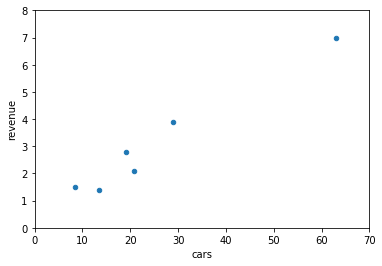

In [37]:
# Car sales
df_car_sales = pd.DataFrame({
    'company': list('ABCDEF'),
    'cars' : [63, 29, 20.8, 19.1, 13.4, 8.5],
    'revenue': [7, 3.9, 2.1, 2.8, 1.4, 1.5],
})

display_scatter_plot(df_car_sales, 'cars', 'revenue')

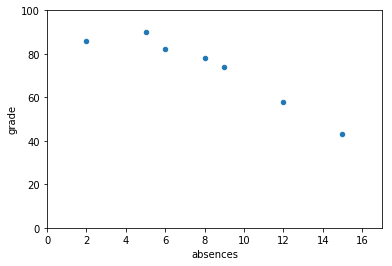

In [38]:
# Absences and grade
df_absences = pd.DataFrame({
    'student': list('ABCDEFG'),
    'absences' : [6, 2, 15, 9, 12, 5, 8],
    'grade': [82, 86, 43, 74, 58, 90, 78],
})
display_scatter_plot(df_absences, 'absences', 'grade')

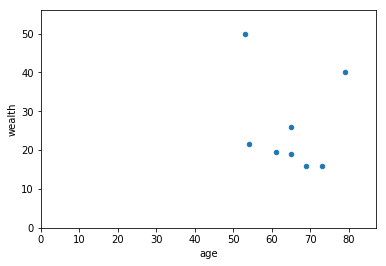

In [40]:
# Age and wealth
df_wealth = pd.DataFrame({
    'person': list('ABCDEFGH'),
    'age' : [73, 65, 53, 54, 79, 69, 61, 65],
    'wealth': [16, 26, 50, 21.5, 40, 16, 19.6, 19],
})
display_scatter_plot(df_wealth, 'age', 'wealth')

# Correlation

## Definitions

- **Correlation coefficient:** measures the strength and direction of a linear relationsip between 2 quantitative variables. Annotation:
    - **r** = sample correlation coefficient
    - **ρ** = population correlation coefficient
    
Here we focus on **PPMC** (Pearson product-moment correlation coefficient). 

**-1 ≤ PPMC ≤ 1**

Here which variable is x and which variable y doesn't matter!


## Formulas

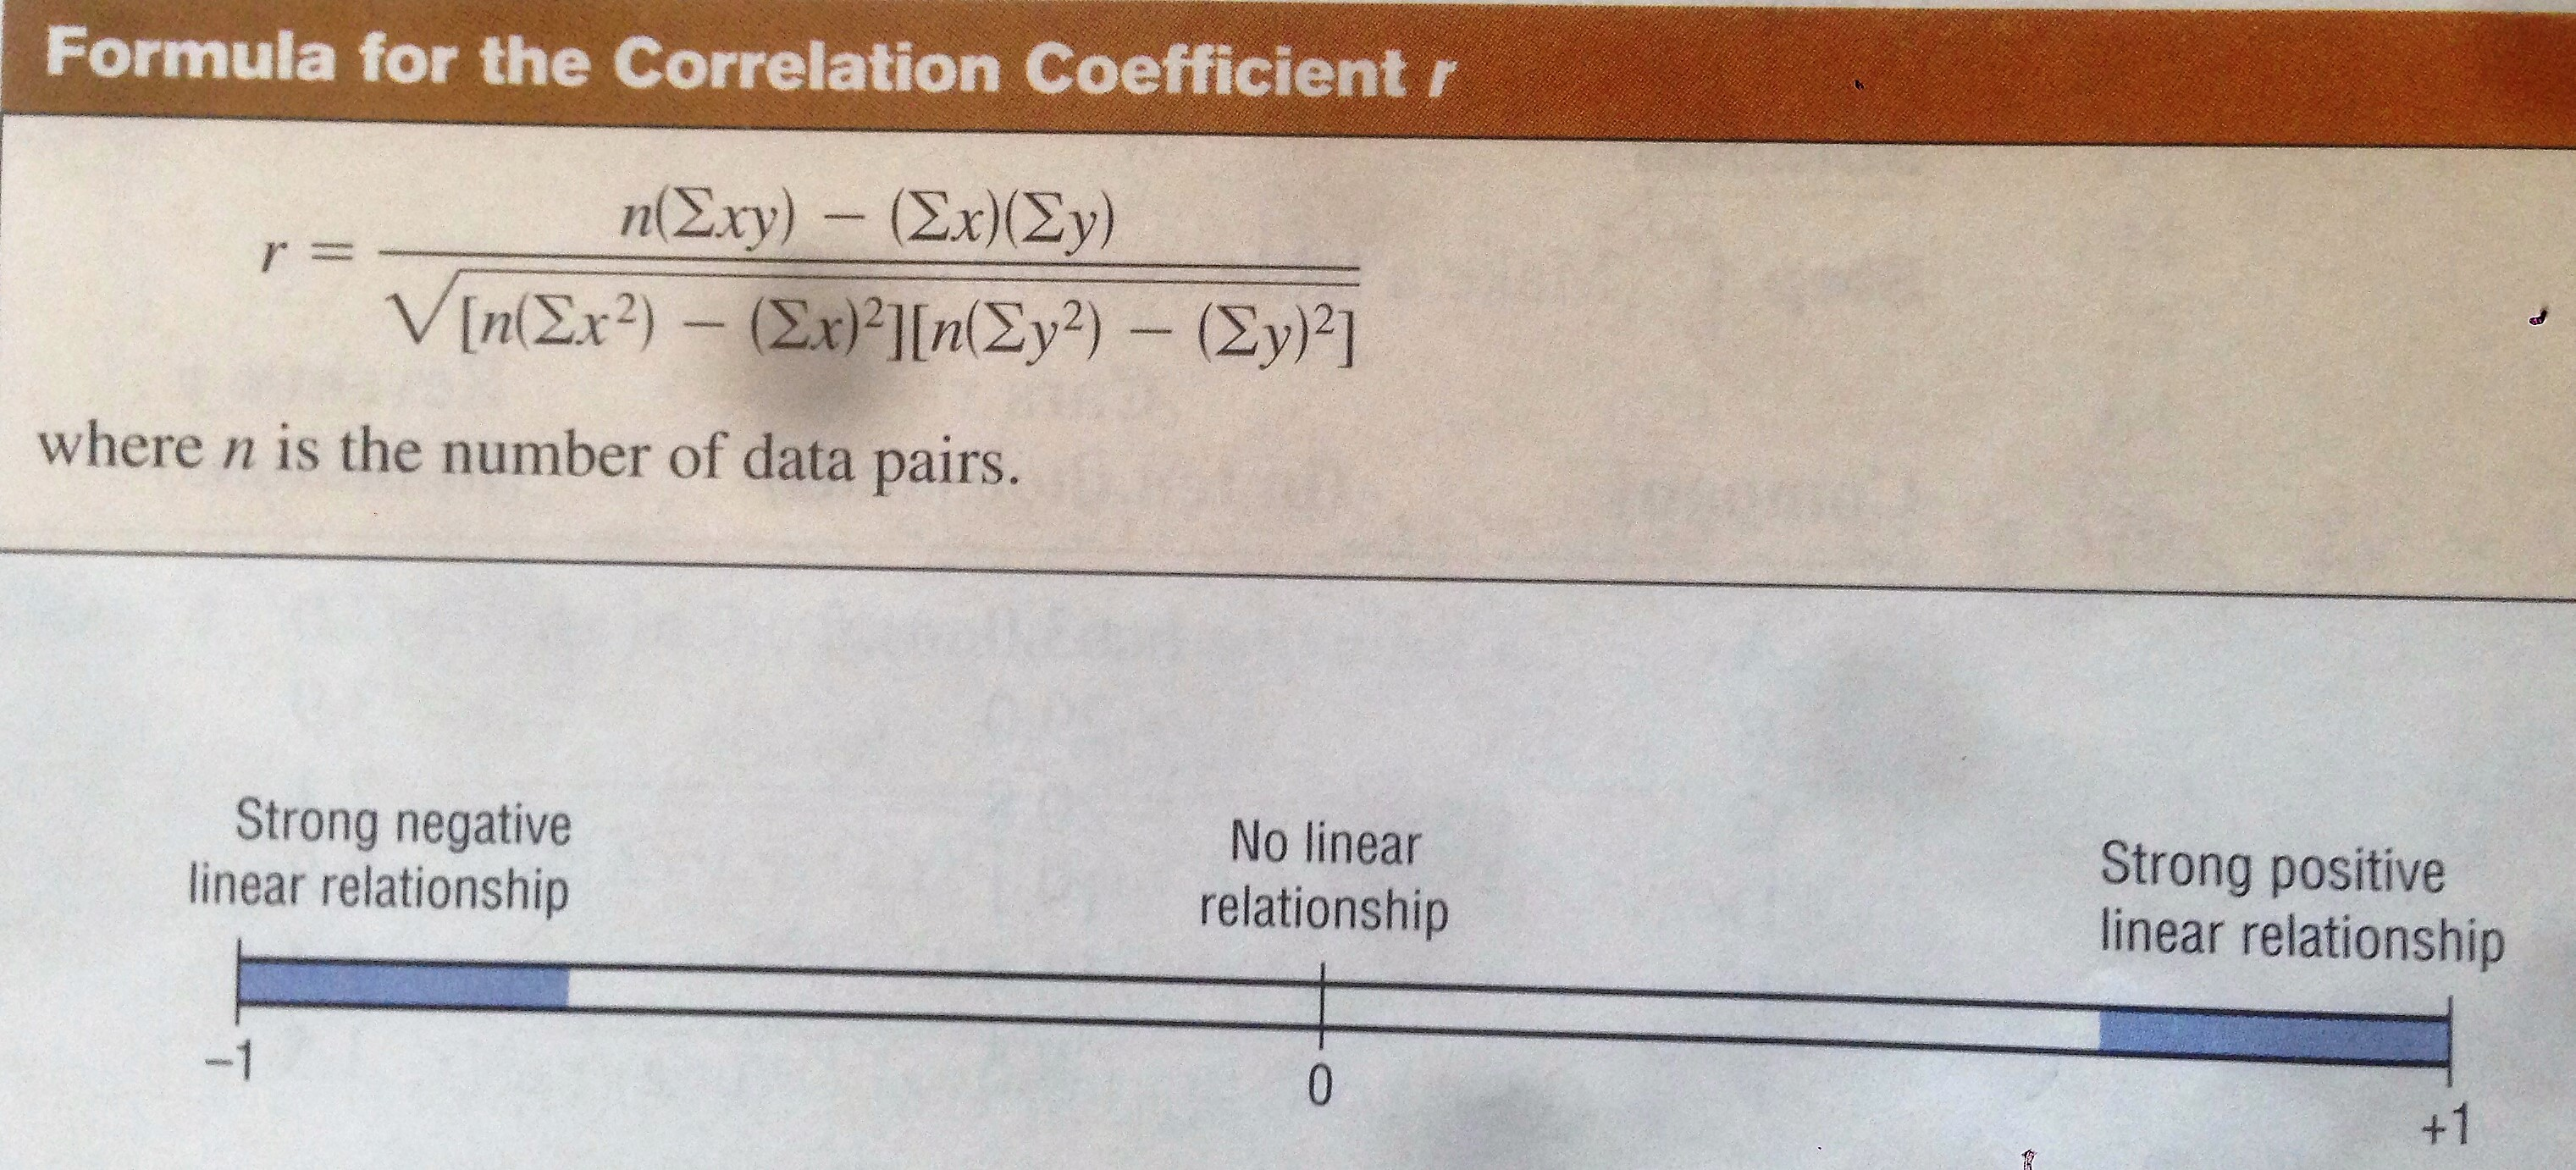

## Implementation

In [43]:
def compute_correlation_coefficient(df, x, y):
    r'''
    Compute PPMC
    '''
    lr = stats.linregress(df[x], df[y])
    return lr.rvalue

## Examples

In [48]:
# Car sales
df_car_sales = pd.DataFrame({
    'company': list('ABCDEF'),
    'cars' : [63, 29, 20.8, 19.1, 13.4, 8.5],
    'revenue': [7, 3.9, 2.1, 2.8, 1.4, 1.5],
})
ppmc = compute_correlation_coefficient(df_car_sales, 'cars', 'revenue')
print('PPMC =', preferred_rounding(ppmc, 3))

PPMC = 0.982


In [50]:
# Absences and grade
df_absences = pd.DataFrame({
    'student': list('ABCDEFG'),
    'absences' : [6, 2, 15, 9, 12, 5, 8],
    'grade': [82, 86, 43, 74, 58, 90, 78],
})
ppmc = compute_correlation_coefficient(df_absences, 'absences', 'grade')
print('PPMC =', preferred_rounding(ppmc, 3))

PPMC = -0.944


# Relationship between correlation coefficient and scatter plot

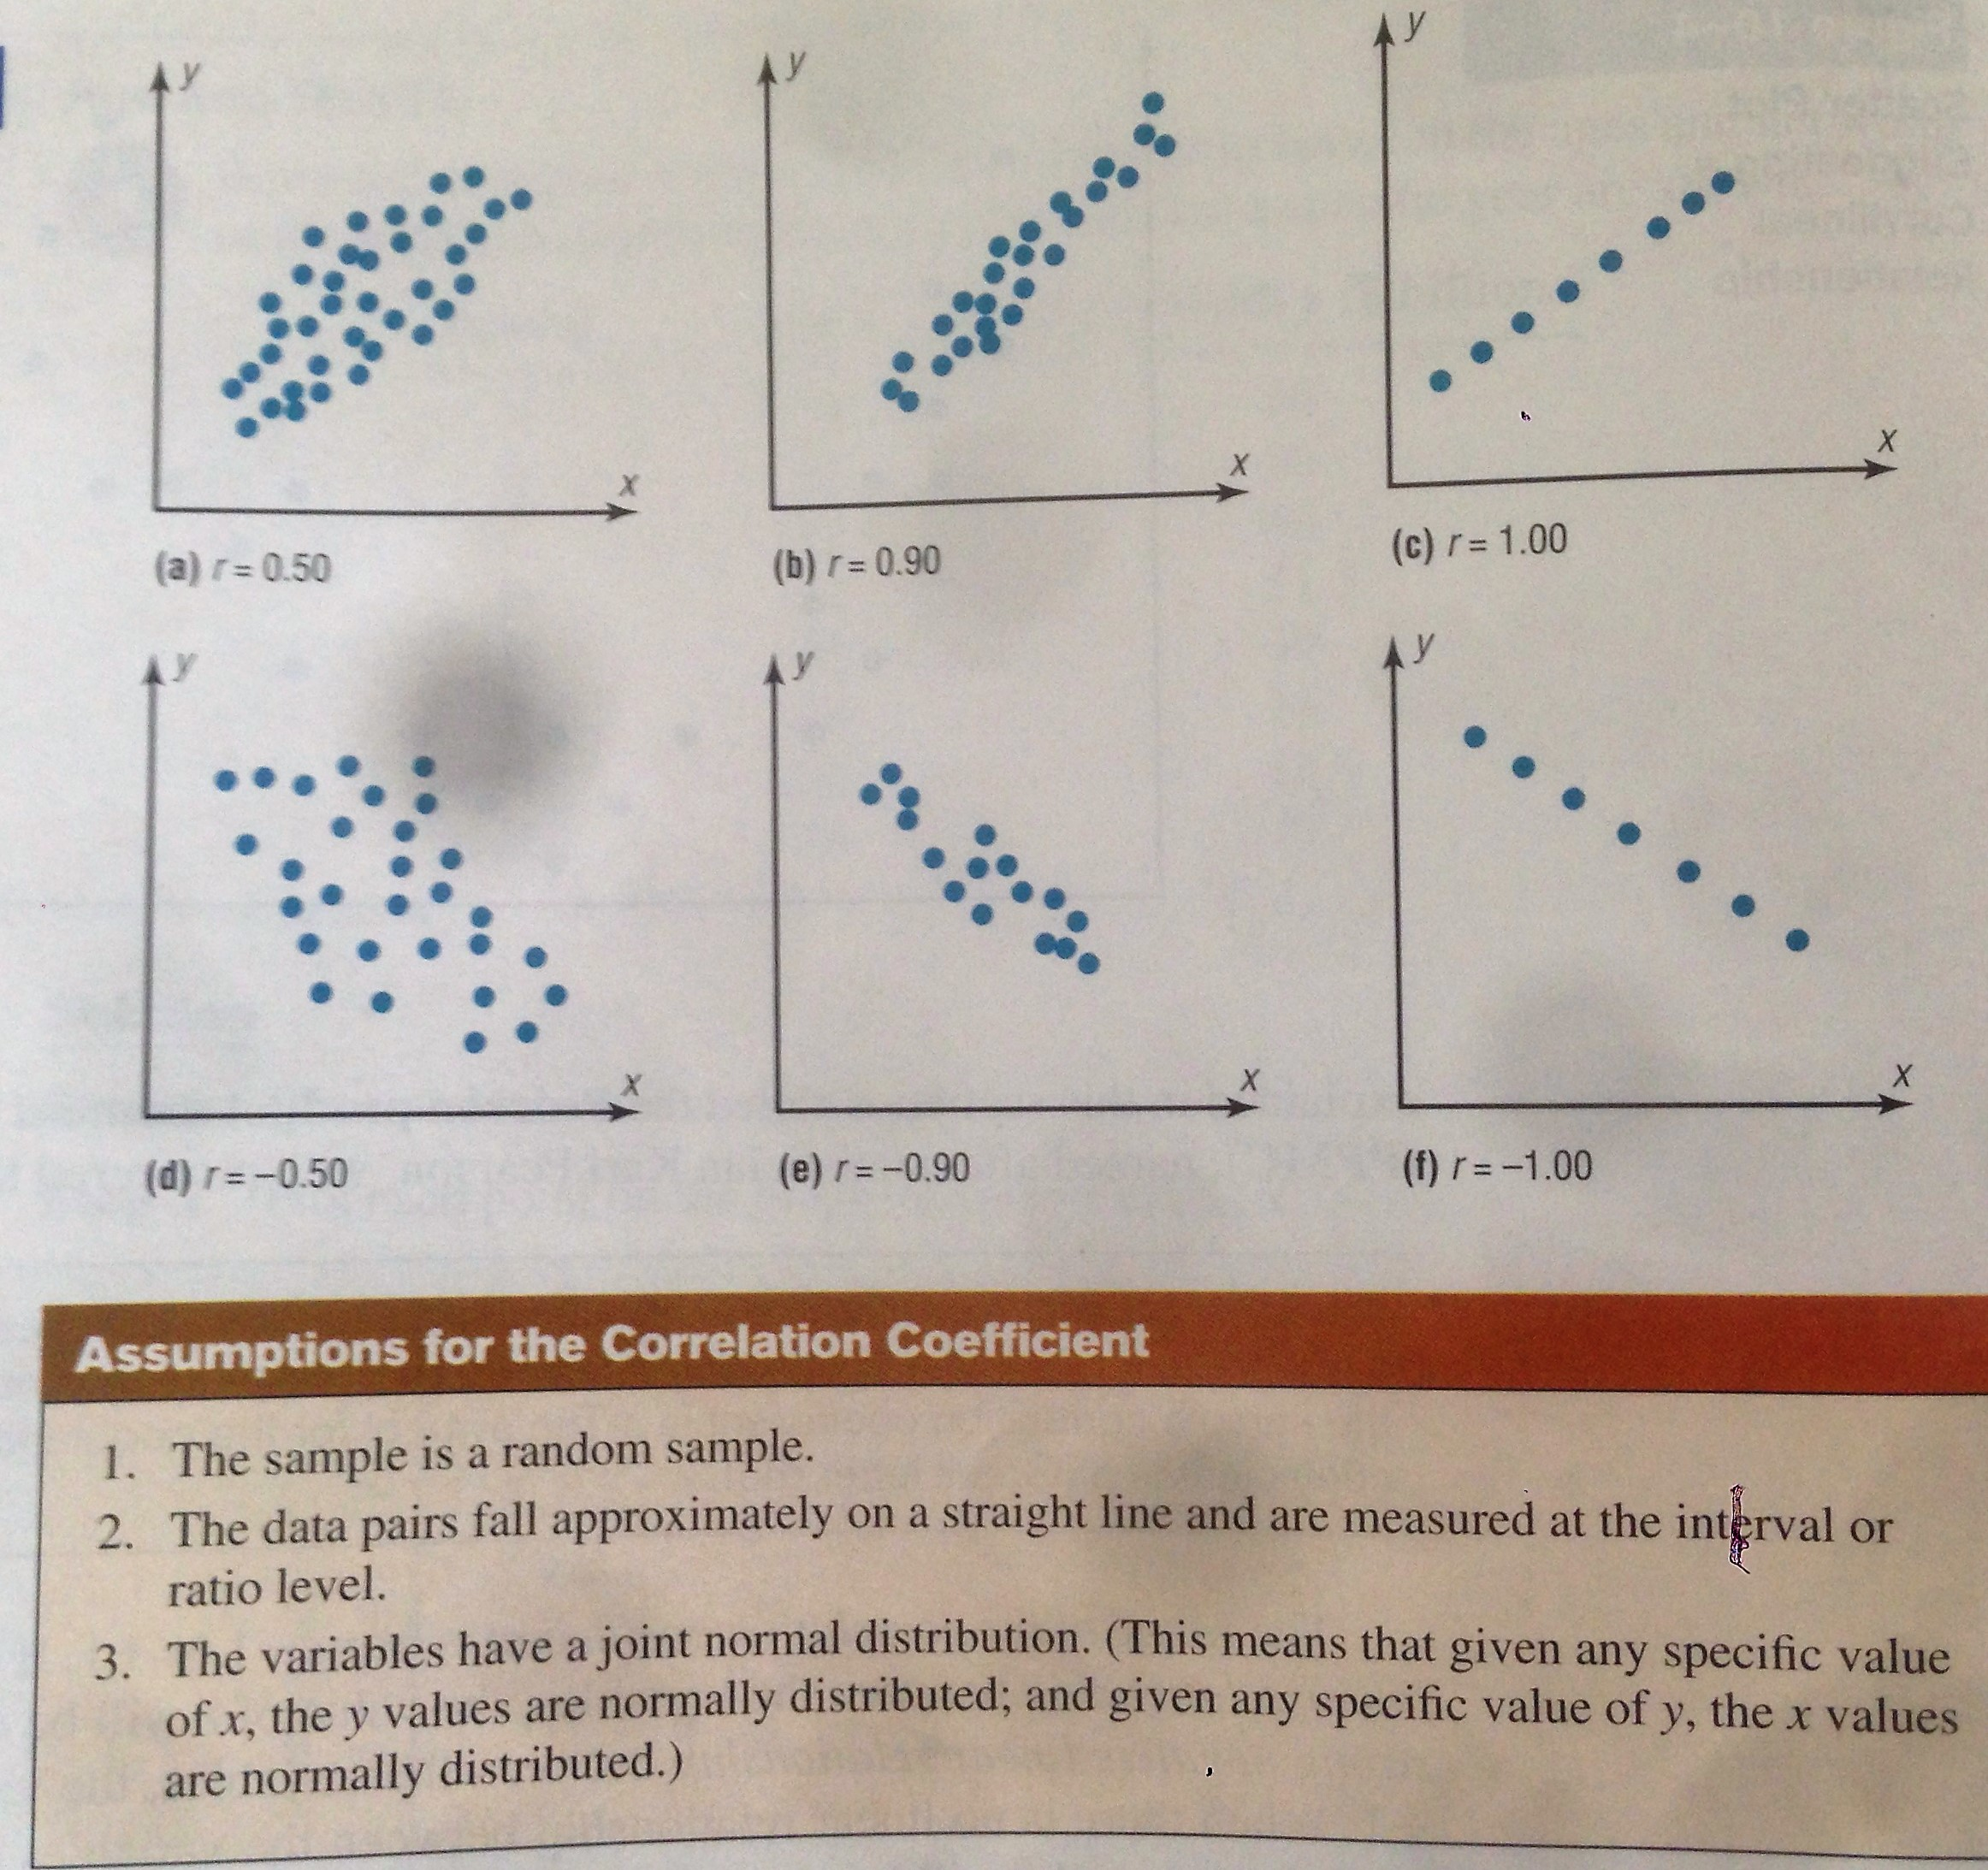

# Significance of the correlation coefficient

Is the value of r statistically significant or due to chance?

Because we are comparing sample to population we can do **hypothesis testing**. And we use a t test.

## Format

H0: ρ = 0 => no correlation between x and y variables in the population.
H1: ρ ≠ 0 => significant correlation between variabls in the population.

There is **no need to identify the claim** as we just want to know if there is a significant linear relationship between variables.

## Formula

t = r √ df/(1-r²)

df = n -2

## Implementation

In [82]:
def compute_hypothesis_test_for_correlation_coefficient(
    n,
    r,
    significance_level=.05,
    ddof=2,
    show_chart=False,
):
    r"""
    Conduct a statistical hypothesis test to validate the relationship between x and y (validate the correlation coefficient).
    Test is always two-tailed
    """
     
    df = n-ddof # degree of freedom
    
    # 1. Hypothesis
    print()
    print('1. Hypothesis')

    # Statement
    h0 = 'H0: ρ = 0'
    h1 = 'H1: ρ ≠ 0'  
    print(h0, 'and', h1)
    
    # 2. Critical value(s)
    print()
    print('2. Critical value(s)')
    cv_left, cv_right = None, None
    tailed_alpha = significance_level/2
    cv_right = abs(get_tscore_from_probability(p_left=tailed_alpha, df=df))
    cv_left = -cv_right
    print('C.V. =', '±' + preferred_rounding(cv_right), '(two-tailed)')

    
    # 3. Test value, P-value and chart
    print()
    print('3. Test value, P-value and chart')
    
    # Hypothesis test for a correlation coefficient

    print('Test type: t test')
    standard_error = 1-np.power(r, 2)
    test_value = r * np.sqrt(df/standard_error) 

    # Calculate P-value
    p_value = stats.t.sf(abs(test_value), df=df) 
    p_value = p_value*2 
    print('test value = ', preferred_rounding(test_value))
    print('P-value = ', preferred_rounding(p_value, 4))
    
    # Chart
    if show_chart:
        display_probability_density_chart(
            cv_left=cv_left,
            cv_right=cv_right,
            test_value=test_value,
        )
        
    # 4a. Result and decision (traditional method)
    print()
    print('4a. Result and decision (traditional method)')
    
    decision_statement = 'reject'
    evidence_statement = 'enough evidence'
    if cv_left and cv_right:
        if (test_value < 0 and cv_left < test_value) or (test_value > 0 and cv_right > test_value):
            decision_statement = 'not reject'
            evidence_statement = 'not enough evidence'
    elif cv_left:
        if cv_left < test_value:
            decision_statement = 'not reject'
            evidence_statement = 'not enough evidence'
    elif cv_right:
        if cv_right > test_value:
            decision_statement = 'not reject'
            evidence_statement = 'not enough evidence'
            
    print('The decision is to', decision_statement, 'the null hypothesis.')
    
    claim = 'there is a significant relationship between x and y'
    print('There is', evidence_statement, 'to support the claim that', claim, 
          'with a significance level of', str(significance_level) + '.')
  
    print()
    if decision_statement == 'reject':
        print('Although ' + claim + ', there is a risk of a type I error',
              '(rejecting H0 althought it is true).')
        print('In this case, the probability of a type I error is', '{:0.0f}%'.format(significance_level*100) + '.')
        print('You could try to reduce the significance level to decrease the probability of a type I error.')
        
    elif decision_statement == 'not reject':
        print('Although the relationship between x and y is not significant, there is a risk of a type II error',
              '(not rejecting H0 althought it is false).')
        print('You could try to increase the significance level to decrease the probability of a type II error.', 
              'However, this would increase the probability of a type I error')
        

    # 4b. Result and decision (P-value method)
    print()
    print('4b. Result and decision (P-value method)')
    if p_value <= tailed_alpha:
        decision_statement_p_value_method = 'reject'
        print('P-value ≤ ∝, therefore we reject H0.')
    else:
        decision_statement_p_value_method = 'not reject'
        print('P-value > ∝, therefore we do NOT reject H0.')  
        
    # 5. Summary
    print()
    print('5. Summary')
    if decision_statement == decision_statement_p_value_method:
        print('The traditional method and P-value method support the same conclusion.')
    else:
        print('The traditional method and P-value method do NOT support the same conclusion.')

## Examples


1. Hypothesis
H0: ρ = 0 and H1: ρ ≠ 0

2. Critical value(s)
C.V. = ±2.78 (two-tailed)

3. Test value, P-value and chart
Test type: t test
test value =  10.39
P-value =  0.0005


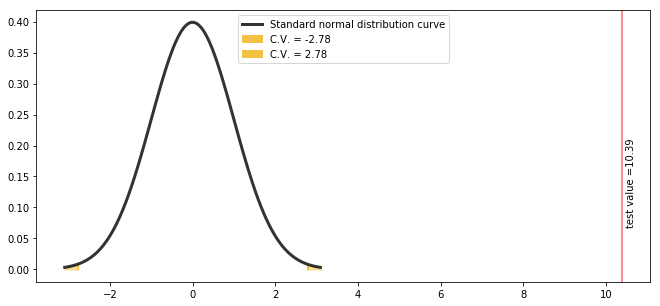


4a. Result and decision (traditional method)
The decision is to reject the null hypothesis.
There is enough evidence to support the claim that there is a significant relationship between x and y with a significance level of 0.05.

Although there is a significant relationship between x and y, there is a risk of a type I error (rejecting H0 althought it is true).
In this case, the probability of a type I error is 5%.
You could try to reduce the significance level to decrease the probability of a type I error.

4b. Result and decision (P-value method)
P-value ≤ ∝, therefore we reject H0.

5. Summary
The traditional method and P-value method support the same conclusion.


In [83]:
df_car_sales = pd.DataFrame({
    'company': list('ABCDEF'),
    'cars' : [63, 29, 20.8, 19.1, 13.4, 8.5],
    'revenue': [7, 3.9, 2.1, 2.8, 1.4, 1.5],
})
ppmc = compute_correlation_coefficient(df_car_sales, 'cars', 'revenue')

hypothesis_test = compute_hypothesis_test_for_correlation_coefficient(
    n=6,
    r=ppmc,
    significance_level=.05,
    ddof=2,
    show_chart=True,
)

p_value: 0.6761681616676287

1. Hypothesis
H0: ρ = 0 and H1: ρ ≠ 0

2. Critical value(s)
C.V. = ±3.71 (two-tailed)

3. Test value, P-value and chart
Test type: t test
test value =  -0.44
P-value =  0.6762


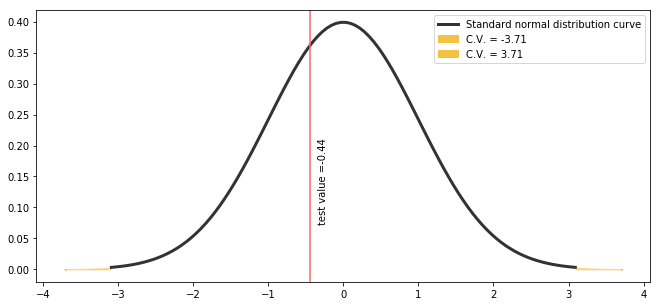


4a. Result and decision (traditional method)
The decision is to not reject the null hypothesis.
There is not enough evidence to support the claim that there is a significant relationship between x and y with a significance level of 0.01.

Although the relationship between x and y is not significant, there is a risk of a type II error (not rejecting H0 althought it is false).
You could try to increase the significance level to decrease the probability of a type II error. However, this would increase the probability of a type I error

4b. Result and decision (P-value method)
P-value > ∝, therefore we do NOT reject H0.

5. Summary
The traditional method and P-value method support the same conclusion.


In [84]:
# Age and wealth
df_wealth = pd.DataFrame({
    'person': list('ABCDEFGH'),
    'age' : [73, 65, 53, 54, 79, 69, 61, 65],
    'wealth': [16, 26, 50, 21.5, 40, 16, 19.6, 19],
})
ppmc = compute_correlation_coefficient(df_wealth, 'age', 'wealth')
n = len(df_wealth['age'])
p_value = stats.linregress(df_wealth['age'], df_wealth['wealth']).pvalue
print('p_value:', p_value)

hypothesis_test = compute_hypothesis_test_for_correlation_coefficient(
    n=n,
    r=ppmc,
    significance_level=.01,
    ddof=2,
    show_chart=True,
)

ppmc = 0.9657924599739434

1. Hypothesis
H0: ρ = 0 and H1: ρ ≠ 0

2. Critical value(s)
C.V. = ±2.78 (two-tailed)

3. Test value, P-value and chart
Test type: t test
test value =  7.45
P-value =  0.0017


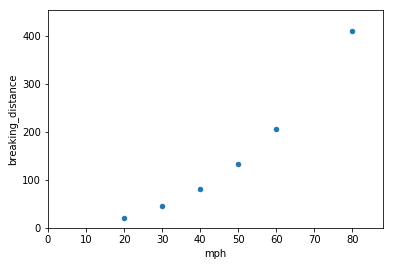

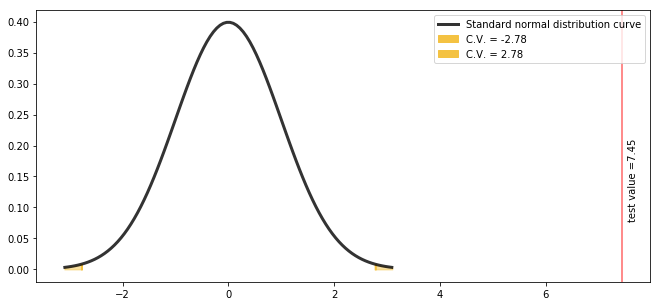


4a. Result and decision (traditional method)
The decision is to reject the null hypothesis.
There is enough evidence to support the claim that there is a significant relationship between x and y with a significance level of 0.05.

Although there is a significant relationship between x and y, there is a risk of a type I error (rejecting H0 althought it is true).
In this case, the probability of a type I error is 5%.
You could try to reduce the significance level to decrease the probability of a type I error.

4b. Result and decision (P-value method)
P-value ≤ ∝, therefore we reject H0.

5. Summary
The traditional method and P-value method support the same conclusion.


In [87]:
# Breaking distance
df_traffic = pd.DataFrame({
    'mph' : [20, 30, 40, 50, 60, 80],
    'breaking_distance': [20, 45, 81, 133, 205, 411],
})
ppmc = compute_correlation_coefficient(df_traffic, 'mph', 'breaking_distance')
n = len(df_traffic['breaking_distance'])

print('ppmc =', ppmc)
display_scatter_plot(df_traffic, 'mph', 'breaking_distance')

hypothesis_test = compute_hypothesis_test_for_correlation_coefficient(
    n=n,
    r=ppmc,
    significance_level=.05,
    ddof=2,
    show_chart=True,
)

# Regression

## Simple Linear Regression